<a href="https://colab.research.google.com/github/gabyxsantos/Economia/blob/modificacoes-matheus/trabalho_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise Exploratória e Preditiva da Política Monetária Brasileira**

In [62]:
!pip install --upgrade --force-reinstall numpy
!pip install "pandas>=2.0,<2.3" --upgrade
!pip install babypandas --no-deps
!pip install matplotlib

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
babypandas 0.1.9 requires pandas<=1.5.3,>=0.24, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [63]:
import numpy as np
import babypandas as bpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##**1. Bases de Dados**

###**1.1 Taxa Selic Semestral**

In [83]:
url_selic = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/Selic.csv"
dados_selic = pd.read_csv(url_selic, sep=";")

# Renomear coluna da taxa Selic
dados_selic = dados_selic.rename(columns={
    "Taxa de juros nominal - Over / Selic - (% a.a.) - Banco Central do Brasil, Boletim, Seção mercado financeiro e de capitais (Bacen/Boletim/M. Finan.) - PAN12_TJOVER12": "Taxa Selic"
})

# Dropar coluna irrelevante
dados_selic = dados_selic.drop('Unnamed: 2', axis=1)

# Ajustar tipo da taxa Selic
dados_selic['Taxa Selic'] = dados_selic['Taxa Selic'].astype(str)
dados_selic['Taxa Selic'] = dados_selic['Taxa Selic'].str.replace(',', '.', regex=True)
dados_selic['Taxa Selic'] = pd.to_numeric(dados_selic['Taxa Selic'], errors='coerce')

# Converter coluna Data para string
dados_selic['Data_str'] = dados_selic['Data'].astype(str)

# Função para converter para formato YYYYQX
def converter_para_trimestre(valor):
    ano, mes_decimal = valor.split('.')
    mes = int(mes_decimal)
    if mes in [1, 2, 3]:
        trimestre = 'Q1'
    elif mes in [4, 5, 6]:
        trimestre = 'Q2'
    elif mes in [7, 8, 9]:
        trimestre = 'Q3'
    else:
        trimestre = 'Q4'
    return f"{ano}{trimestre}"

# Aplicar a função na coluna Data
dados_selic['Data'] = dados_selic['Data_str'].apply(converter_para_trimestre)

# Remover coluna auxiliar
dados_selic = dados_selic.drop(columns=['Data_str'])

# Agrupar por trimestre (YYYYQX) e tirar a média, removendo repetições
dados_selic = dados_selic.groupby('Data', as_index=False)['Taxa Selic'].mean()

# Mostrar resultado
dados_selic


,Data,Taxa Selic
0,1974Q1,15.711943
1,1974Q2,17.055855
2,1974Q3,17.276066
3,1974Q4,20.925704
4,1975Q1,20.968529
...,...,...
201,2024Q2,10.516350
202,2024Q3,10.998928
203,2024Q4,10.825927
204,2025Q1,12.504433


###**1.2 Desocupação**

####**1.2.1 Desocupação por grupo etário**

In [65]:
url_desocupacaoIdade = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/desocupacaoIdade.csv"
dados_desocupacaoIdade = pd.read_csv(url_desocupacaoIdade, sep=";", skiprows=1, header=None)
dados_desocupacaoIdade = dados_desocupacaoIdade.drop(index=7, columns=1)
dados_desocupacaoIdade

,0,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,Grupo de idade,1º trimestre 2012,2º trimestre 2012,3º trimestre 2012,4º trimestre 2012,1º trimestre 2013,2º trimestre 2013,3º trimestre 2013,4º trimestre 2013,1º trimestre 2014,...,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023,3º trimestre 2023,4º trimestre 2023,1º trimestre 2024,2º trimestre 2024,3º trimestre 2024,4º trimestre 2024,1º trimestre 2025
1,14 a 17 anos,24.8,22.1,20.4,19.6,24.8,22.8,20.8,18.6,22.2,...,29,33.1,29.8,30.2,28.2,30.2,28.2,25.1,24.7,26.4
2,18 a 24 anos,16.1,15.3,14.1,13.8,16,15.1,14.7,12.8,15.3,...,16.4,18,16.6,16,15.3,16.8,14.3,13.4,12.9,14.9
3,25 a 39 anos,7.1,7,6.6,6.5,7.5,7.1,6.5,5.9,6.5,...,7.1,8.2,7.4,7,6.9,7.3,6.3,5.9,5.8,6.5
4,40 a 59 anos,4,3.6,3.6,3.4,4,3.8,3.4,3.2,3.7,...,5.3,5.6,5.3,5.1,4.9,5.2,4.6,4.1,4,4.7
5,60 anos ou mais,2.1,2.2,1.7,2,2.1,1.8,1.9,1.6,2.1,...,3.4,3.9,3.4,3.2,3.5,3.2,3.1,3,3,3.1
6,Total,8,7.6,7.1,6.9,8.1,7.5,7,6.3,7.2,...,7.9,8.8,8,7.7,7.4,7.9,6.9,6.4,6.2,7


####**1.2.2 Desocupação por sexo**

In [66]:
url_desocupacaoSexo = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/desocupacaoSexo.csv"
dados_desocupacaoSexo = pd.read_csv(url_desocupacaoSexo, sep=";", skiprows=1, header=None)
dados_desocupacaoSexo = dados_desocupacaoSexo.drop(index=4, columns=1)
dados_desocupacaoSexo

,0,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,Sexo,1º trimestre 2012,2º trimestre 2012,3º trimestre 2012,4º trimestre 2012,1º trimestre 2013,2º trimestre 2013,3º trimestre 2013,4º trimestre 2013,1º trimestre 2014,...,4º trimestre 2022,1º trimestre 2023,2º trimestre 2023,3º trimestre 2023,4º trimestre 2023,1º trimestre 2024,2º trimestre 2024,3º trimestre 2024,4º trimestre 2024,1º trimestre 2025
1,Homens,6.2,6.1,5.8,5.7,6.5,6,5.7,5.1,5.9,...,6.5,7.2,6.9,6.4,6,6.5,5.6,5.3,5.1,5.7
2,Mulheres,10.5,9.6,9,8.5,10.2,9.5,8.9,7.8,9,...,9.8,10.8,9.6,9.3,9.2,9.8,8.6,7.7,7.6,8.7
3,Total,8,7.6,7.1,6.9,8.1,7.5,7,6.3,7.2,...,7.9,8.8,8,7.7,7.4,7.9,6.9,6.4,6.2,7


####**1.2.3 Desocupação total**

In [67]:
url_txDesocupacao = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/taxaDesocupacao.csv"
dados_txDesocupacao = pd.read_csv(url_txDesocupacao, sep=";", skiprows=1, header=None)
dados_txDesocupacao = dados_txDesocupacao.drop(index = 2)
dados_txDesocupacao

# Mapa para converter nomes dos meses para números
mes_map = {
    "jan": 1, "fev": 2, "mar": 3, "abr": 4, "mai": 5, "jun": 6,
    "jul": 7, "ago": 8, "set": 9, "out": 10, "nov": 11, "dez": 12
}

def col_to_quarter(col_name):
    if not isinstance(col_name, str):
        return col_name

    if " " not in col_name:
        return col_name

    partes = col_name.split()
    if len(partes) < 2:
        return col_name

    meses = partes[0].split('-')
    if len(meses) != 3:
        return col_name

    ano = partes[1]
    mes_central = meses[1].lower()
    mes_num = mes_map.get(mes_central, None)
    if mes_num is None:
        return col_name

    trimestre = (mes_num - 1) // 3 + 1
    return f"{ano}Q{trimestre}"

# URL da base de dados
url_txDesocupacao = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/taxaDesocupacao.csv"

# Leitura do CSV, pulando a primeira linha e sem header
dados_txDesocupacao = pd.read_csv(url_txDesocupacao, sep=";", skiprows=1, header=None)

# Removendo a linha de índice 2 que está suja/dentro do arquivo original
dados_txDesocupacao = dados_txDesocupacao.drop(index=2)

# Criar lista das novas colunas, renomeando só a partir da 2ª coluna
novas_colunas = ['Localidade'] + [col_to_quarter(x) for x in dados_txDesocupacao.loc[0][1:]]

# Atribuir as colunas ao dataframe
dados_txDesocupacao.columns = novas_colunas

# Remover a linha 0 que estava com os nomes antigos das colunas
dados_txDesocupacao = dados_txDesocupacao.drop(index=0).reset_index(drop=True)



# Separar a coluna Localidade
df_ident = dados_txDesocupacao[['Localidade']]

# Pegar só as colunas de valores (trimestres)
df_values = dados_txDesocupacao.drop(columns=['Localidade'])

# Converter para numérico, ignorando erros
df_values = df_values.apply(pd.to_numeric, errors='coerce')

# Transpor, agrupar por nome (que viram linhas), tirar a média, e voltar a transpor
df_mean = df_values.T.groupby(df_values.columns).mean().T

# Juntar a coluna Localidade de volta
df_final = pd.concat([df_ident, df_mean], axis=1)

df_transposed = df_final.set_index('Localidade').T.reset_index()

# Renomear colunas: 'Localidade' vira 'Trimestre', 'Brasil' vira 'Desocupação(%)'
df_transposed = df_transposed.rename(columns={'index': 'Trimestre', 'Brasil': 'Desocupação(%)'})

df_transposed


Localidade,Trimestre,Desocupação(%)
0,2012Q1,7.900000
1,2012Q2,7.600000
2,2012Q3,7.166667
3,2012Q4,6.850000
4,2013Q1,7.933333
...,...,...
49,2024Q2,6.933333
50,2024Q3,6.400000
51,2024Q4,6.633333
52,2025Q1,6.800000


###**1.3 Rendimento médio**

In [68]:
url_rendMedio = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/base_de_dados/rendimentoMedio.csv"
dados_rendMedio = pd.read_csv(url_rendMedio, sep=";", skiprows=1, header=None)
dados_rendMedio = dados_rendMedio.drop(index = 2)
dados_rendMedio

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,,jan-fev-mar 2012,fev-mar-abr 2012,mar-abr-mai 2012,abr-mai-jun 2012,mai-jun-jul 2012,jun-jul-ago 2012,jul-ago-set 2012,ago-set-out 2012,set-out-nov 2012,...,mai-jun-jul 2024,jun-jul-ago 2024,jul-ago-set 2024,ago-set-out 2024,set-out-nov 2024,out-nov-dez 2024,nov-dez-jan 2025,dez-jan-fev 2025,jan-fev-mar 2025,fev-mar-abr 2025
1,Brasil,2999,3010,3002,3009,3024,3034,3029,3025,3022,...,3343,3360,3349,3368,3383,3397,3414,3427,3436,3426


###**1.4 Gastos primários do governo**

In [69]:
import pandas as pd
import requests
from io import BytesIO

anos = range(2009, 2025)
base_url = "https://github.com/gabyxsantos/Economia/raw/main/base_de_dados/gastos{}.xlsx"

dfs = []

for ano in anos:
    url = base_url.format(ano)
    print(f"Lendo {ano}...")
    try:
        response = requests.get(url)
        df = pd.read_excel(BytesIO(response.content))
        df['ID_ANO'] = ano

        # Converter PAGAMENTOS_TOTAIS para número (remover pontos, trocar vírgulas por ponto)
        df['PAGAMENTOS_TOTAIS'] = (
            df['PAGAMENTOS_TOTAIS']
            .astype(str)
            .str.replace('.', '', regex=False)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )

        # Criar coluna TRIMESTRE
        df['TRIMESTRE'] = ((df['ID_MES'] - 1) // 3) + 1

        dfs.append(df)
    except Exception as e:
        print(f"Erro ao ler {ano}: {e}")

df_final = pd.concat(dfs, ignore_index=True)

# Filtrar só despesas primárias
df_primaria = df_final[df_final['PRIMARIA_FINANCEIRA'] == 'Primária']

# Agrupar por ano e trimestre somando os pagamentos
gastos_por_trimestre = (
    df_primaria
    .groupby(['ID_ANO', 'TRIMESTRE'])['PAGAMENTOS_TOTAIS']
    .sum()
    .reset_index()
)

# Opcional: renomear colunas para melhor leitura
gastos_por_trimestre.columns = ['Ano', 'Trimestre', 'Gastos Primários (R$)']

print(gastos_por_trimestre)

Lendo 2009...
Lendo 2010...
Lendo 2011...
Lendo 2012...
Lendo 2013...
Lendo 2014...
Lendo 2015...
Lendo 2016...
Lendo 2017...
Lendo 2018...
Lendo 2019...
Lendo 2020...
Lendo 2021...
Lendo 2022...
Lendo 2023...
Lendo 2024...
     Ano  Trimestre  Gastos Primários (R$)
0   2009          1           1.535795e+13
1   2009          2           1.478589e+13
2   2009          3           1.448610e+13
3   2009          4           1.703555e+13
4   2010          1           1.655958e+13
..   ...        ...                    ...
59  2023          4           6.796594e+13
60  2024          1           1.679323e+16
61  2024          2           3.254719e+16
62  2024          3           2.736252e+16
63  2024          4           4.485090e+16

[64 rows x 3 columns]


In [70]:
gastos_por_trimestre['Trimestre_ano'] = gastos_por_trimestre.apply(
    lambda row: f"{int(row['Ano'])}Q{int(row['Trimestre'])}", axis=1
)

gastos_por_trimestre = gastos_por_trimestre[['Trimestre_ano', 'Gastos Primários (R$)']]

gastos_por_trimestre



,Trimestre_ano,Gastos Primários (R$)
0,2009Q1,1.535795e+13
1,2009Q2,1.478589e+13
2,2009Q3,1.448610e+13
3,2009Q4,1.703555e+13
4,2010Q1,1.655958e+13
...,...,...
59,2023Q4,6.796594e+13
60,2024Q1,1.679323e+16
61,2024Q2,3.254719e+16
62,2024Q3,2.736252e+16


###**1.5 Crescimento do PIB**

####**1.5.1 PIB Anual**

In [71]:
PIB=pd.read_excel("https://github.com/gabyxsantos/Economia/raw/refs/heads/main/base_de_dados/PIB%20(1).xls")

# Pega a transposta
PIB=PIB.T
colunas_para_remover=PIB.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB=PIB.drop(colunas_para_remover,axis=1)
PIB=PIB.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB.shape[1]):
    PIB.rename(columns={PIB.columns[i]: PIB.iloc[0, i]}, inplace=True)
PIB = PIB.drop(0)
PIB=PIB.rename(columns={'Real GDP growth (Annual percent change)':'Ano','Brazil':'Cresc_PIB'})
PIB

,Ano,Cresc_PIB
1,1980,9.2
2,1981,-4.4
3,1982,0.6
4,1983,-3.4
5,1984,5.3
...,...,...
47,2026,2.0
48,2027,2.2
49,2028,2.3
50,2029,2.4


####**1.5.2 PIB Trimestral**

In [72]:
url = "https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/PIB_Trimestral.csv"

df = pd.read_csv(url, sep=";", skiprows=1)

def trimestre_to_YYYYQX(text):
    parts = text.split()
    if len(parts) == 3:
        tri_num = parts[0][0]
        ano = parts[2]
        return f"{ano}Q{tri_num}"
    else:
        return text

novas_colunas = [df.columns[0]] + [trimestre_to_YYYYQX(col) for col in df.columns[1:]]
df.columns = novas_colunas

PIB_Tri = df.set_index(df.columns[0]).T.reset_index()
PIB_Tri = PIB_Tri.rename(columns={"index": "Trimestre", "Brasil": "PIB (%)"})
PIB_Tri = PIB_Tri.drop(columns=['Fonte: "IBGE - Contas Nacionais Trimestrais"'])

PIB_Tri

,Trimestre,PIB (%)
0,1996Q1,2.5
1,1996Q2,2.1
2,1996Q3,2.3
3,1996Q4,2.2
4,1997Q1,3.2
...,...,...
112,2024Q1,2.8
113,2024Q2,2.7
114,2024Q3,3.1
115,2024Q4,3.4


###**1.5.3 PIB Per Capita**

In [73]:
PIB_PC=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/PIB_PC%20(1).xls", engine="xlrd")

# Pega a transposta
PIB_PC=PIB_PC.T
colunas_para_remover=PIB_PC.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB_PC=PIB_PC.drop(colunas_para_remover,axis=1)
PIB_PC=PIB_PC.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB_PC.shape[1]):
    PIB_PC.rename(columns={PIB_PC.columns[i]: PIB_PC.iloc[0, i]}, inplace=True)
PIB_PC = PIB_PC.drop(0)
PIB_PC=PIB_PC.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Ano','Brazil':'PIB Per Capita (U$)'})
PIB_PC

,Ano,PIB Per Capita (U$)
1,1980,1229.883
2,1981,1382.548
3,1982,1446.228
4,1983,1134.932
5,1984,1105.852
...,...,...
47,2026,10215.584
48,2027,10697.469
49,2028,11208.539
50,2029,11774.535


###**1.6 Taxa de Inflação**

####**1.6.1 Inflação anual**

In [74]:
Inflacao=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/Inflacao_Brasil%20(1).xls", engine="xlrd")

# Pega a transposta
Inflacao=Inflacao.T
colunas_para_remover=Inflacao.columns[[0,2,3]]
# Remove colunas desnecessárias
Inflacao=Inflacao.drop(colunas_para_remover,axis=1)
Inflacao=Inflacao.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, Inflacao.shape[1]):
    Inflacao.rename(columns={Inflacao.columns[i]: Inflacao.iloc[0, i]}, inplace=True)
Inflacao = Inflacao.drop(0)
Inflacao=Inflacao.rename(columns={'Inflation rate, end of period consumer prices (Annual percent change)':'Ano','Brazil':'Inflação (%)'})
Inflacao

,Ano,Inflação (%)
1,1980,no data
2,1981,95.7
3,1982,104.8
4,1983,164.0
5,1984,215.3
...,...,...
47,2026,3.9
48,2027,3.0
49,2028,3.0
50,2029,3.0


####**1.6.2 Inflação trimestral**

In [75]:
import pandas as pd

# URL do arquivo CSV no formato RAW
url = "https://raw.githubusercontent.com/gabyxsantos/Economia/main/base_de_dados/ipca_202503SerieHist%20(1).csv"

# Lê os dados pulando o cabeçalho inicial irrelevante
df = pd.read_csv(url, encoding="latin1", sep=",", skiprows=7)

# Renomeia as colunas
df.columns = ["ANO", "MÊS", "ÍNDICE", "VAR_MÊS", "VAR_3_MESES", "VAR_6_MESES", "VAR_ANO", "VAR_12_MESES"]

# Remove linhas totalmente vazias
df = df.dropna(how="all")

# Remove linhas onde 'VAR_MÊS' não é numérico
df = df[df["VAR_MÊS"].str.replace(",", ".").str.replace(" ", "").str.replace("(%","", regex=False).str.replace(")", "", regex=False).str.match(r"^-?\d+(\.\d+)?$") == True]

# Preenche os anos ausentes com o último valor válido
df["ANO"] = df["ANO"].ffill()

# Converte inflação para float
df["VAR_MÊS"] = df["VAR_MÊS"].str.replace(",", ".").astype(float)

# Mapeia os meses
meses = {
    "JAN": 1, "FEV": 2, "MAR": 3, "ABR": 4, "MAI": 5, "JUN": 6,
    "JUL": 7, "AGO": 8, "SET": 9, "OUT": 10, "NOV": 11, "DEZ": 12
}
df["MÊS_NUM"] = df["MÊS"].map(meses)

# Cria coluna de data
df["DATA"] = pd.to_datetime(dict(year=df["ANO"].astype(int), month=df["MÊS_NUM"], day=1))

# Cria coluna de trimestre
df["TRIMESTRE"] = df["DATA"].dt.to_period("Q")

# Agrupa por trimestre somando a inflação mensal
df_trimestre = df.groupby("TRIMESTRE")["VAR_MÊS"].sum().reset_index()
df_trimestre.columns = ["Trimestre", "Inflação Acumulada (%)"]

# Exibe todos os trimestres
df_trimestre


,Trimestre,Inflação Acumulada (%)
0,1994Q1,124.33
1,1994Q2,134.14
2,1994Q3,10.23
3,1994Q4,7.14
4,1995Q1,4.27
...,...,...
120,2024Q1,1.41
121,2024Q2,1.05
122,2024Q3,0.80
123,2024Q4,1.47


##**2. Análise Exploratória das Variáveis Econômicas**

Como tema central do nosso trabalho, objetivamos investigar como a taxa Selic afeta o mercado e o quanto fatores como desemprego, inflação, gastos governamentais e PIB estão relacionados com esta.

###**2.1 Inflação x Taxa Selic**

É de conhecimento público, que o Banco Central analisa a inflação atual e as expectativas futuras, e com base nessa análise e na meta de inflação, o BC define a Taxa Selic. Ou seja, se o Banco Central percebe que a inflação está acima da meta ou que as expectativas de inflação futura estão desancoradas (ou seja, as pessoas e o mercado esperam que a inflação continue alta), ele tende a aumentar a taxa, tendo como objetivo, justamente, esfriar a economia e trazer a inflação para a meta.

Com base nisso, nossa expectativa é conseguir, ao plotar os gráficos, ver uma relação clara de causa e efeito entre os índices abordados.

Para essa análise, seguiremos os seguintes passos:

* Formatação dos dados, ajustando os períodos temporais
* Análise dos gráficos de linha de maneira isolada
* Verificar quão for é a correlação entre as variáveis



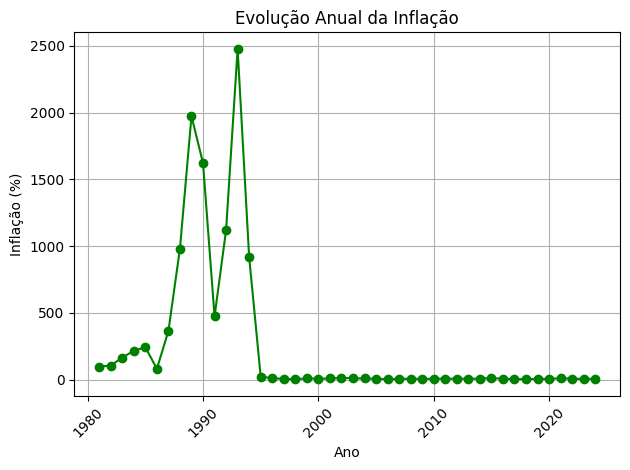

In [76]:
inflacao_anual = Inflacao[(Inflacao['Ano'] > 1980) & (Inflacao['Ano'] < 2025)]

plt.plot(inflacao_anual['Ano'], inflacao_anual['Inflação (%)'], marker='o', linestyle='-', color='green')
plt.title('Evolução Anual da Inflação')
plt.xlabel('Ano')
plt.ylabel('Inflação (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

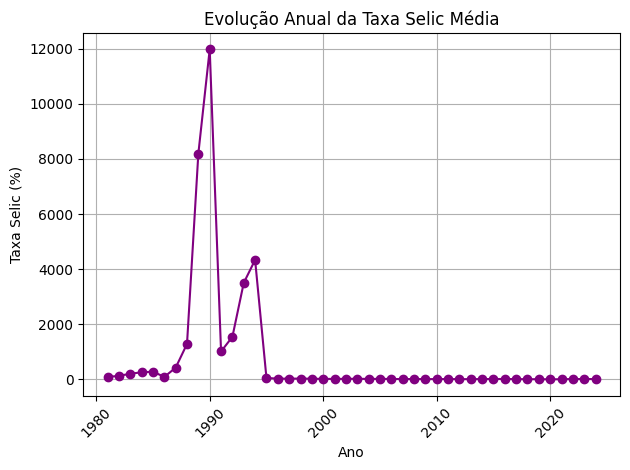

In [84]:
selic_anual = dados_selic.copy()

# Garante que a coluna 'Data' seja string
selic_anual['Data'] = selic_anual['Data'].astype(str)

# Extrai apenas o ano dos valores no formato 'YYYYQX'
selic_anual['Ano'] = selic_anual['Data'].str[:4].astype(int)

# Agrupa por ano e calcula a média da Selic
selic_anual = (
    selic_anual
    .groupby('Ano')['Taxa Selic']
    .mean()
    .reset_index()
)

# Filtra o intervalo de anos desejado
selic_anual = selic_anual[(selic_anual['Ano'] > 1980) & (selic_anual['Ano'] < 2025)]

# Gráfico
plt.plot(selic_anual['Ano'], selic_anual['Taxa Selic'], marker='o', linestyle='-', color='purple')
plt.title('Evolução Anual da Taxa Selic Média')
plt.xlabel('Ano')
plt.ylabel('Taxa Selic (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Por Que Taxas Tão Altas Antes dos anos 2000?**

Antes dos anos 2000, principalmente antes de 1994, a hiperinflação era algo constante e impactante no Brasil, sendo causada por:

*   Governo gastando demais e imprimindo dinheiro para pagar as contas.
*   Tudo na economia (preços, salários) sendo automaticamente reajustado pela inflação passada, criando um ciclo vicioso.

Nesse cenário, as taxas de juros (como a Selic) eram altíssimas apenas para tentar proteger o dinheiro da rápida perda de valor pela inflação. Eram mais um sintoma da doença do que uma ferramenta de controle eficaz, pois a inflação era estrutural.

**Novo espaço temporal:**
O ponto de virada da economia brasileira ocorreu com O Plano Real (1994). Essa estratégia multifacetada combateu a inflação em suas raízes, atuando em frentes como o ajuste fiscal, a desindexação da economia (com a URV) e a introdução de uma nova moeda (o Real) com forte credibilidade. Temdo isso em mente, buscando uma análise mais recente e adequada, restringiremos nosso espaço temporal das tabelas aos anos posteriores a 2000, considerando alguns anos após a criação do Plano Real, visto que o país precisou se estabilizar.

In [78]:
inflacao_anual = inflacao_anual[(inflacao_anual['Ano'] > 1999) & (inflacao_anual['Ano'] < 2025)].reset_index(drop=True)
selic_anual = selic_anual[(selic_anual['Ano'] > 1999) & (selic_anual['Ano'] < 2025)].reset_index(drop=True)

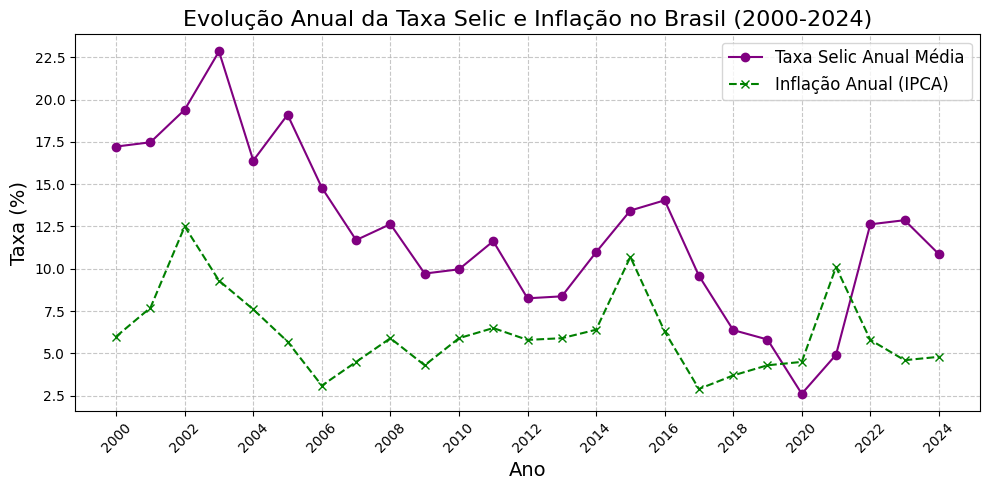

In [85]:
selic_anual['Ano'] = selic_anual['Ano'].astype(int)
inflacao_anual['Ano'] = inflacao_anual['Ano'].astype(int)
selic_anual['Taxa Selic'] = selic_anual['Taxa Selic'].astype(float)
inflacao_anual['Inflação (%)'] = inflacao_anual['Inflação (%)'].astype(float)

#juntando os dfs
selic_inflacao = pd.merge(selic_anual, inflacao_anual, on='Ano')

plt.figure(figsize=(10, 5))
plt.plot(selic_inflacao['Ano'], selic_inflacao['Taxa Selic'],
         label='Taxa Selic Anual Média', marker='o', linestyle='-', color='purple')
plt.plot(selic_inflacao['Ano'], selic_inflacao['Inflação (%)'],
         label='Inflação Anual (IPCA)', marker='x', linestyle='--', color='green')

plt.title('Evolução Anual da Taxa Selic e Inflação no Brasil (2000-2024)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(selic_inflacao['Ano'][::2], rotation=45)
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

In [80]:
selic_inflacao

,Ano,Taxa Selic,Inflação (%)
0,2000,17.454669,6.0
1,2001,17.336973,7.7
2,2002,19.175277,12.5
3,2003,23.374688,9.3
4,2004,16.242795,7.6
...,...,...,...
20,2020,2.758037,4.5
21,2021,4.460969,10.1
22,2022,12.394302,5.8
23,2023,13.035626,4.6


Correlação entre a Taxa Selic e a Inflação (normalizada): 0.40


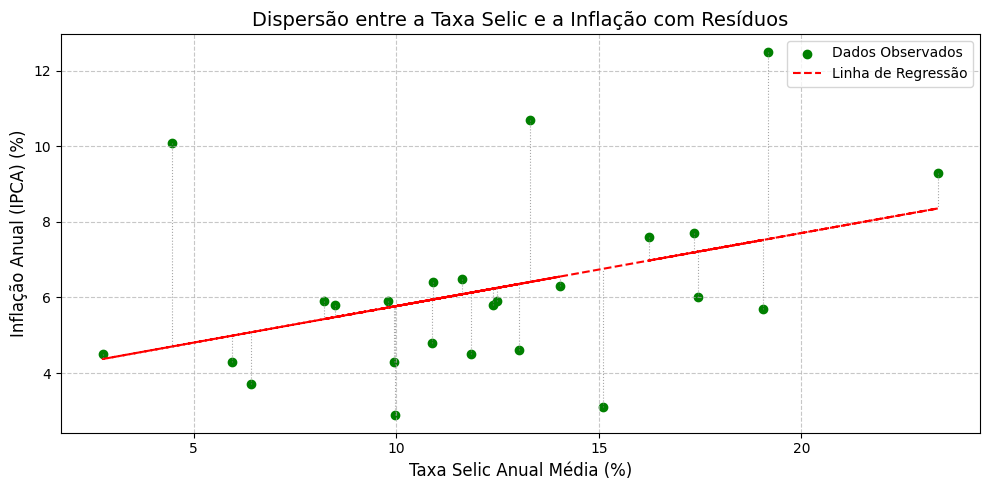

In [81]:
selic_inflacao['Taxa Selic Normalizada'] = (selic_inflacao['Taxa Selic'] - selic_inflacao['Taxa Selic'].mean()) / selic_inflacao['Taxa Selic'].std()
selic_inflacao['Inflação (%) Normalizada'] = (selic_inflacao['Inflação (%)'] - selic_inflacao['Inflação (%)'].mean()) / selic_inflacao['Inflação (%)'].std()

correlacao = selic_inflacao['Taxa Selic Normalizada'].corr(selic_inflacao['Inflação (%) Normalizada'])
print(f'Correlação entre a Taxa Selic e a Inflação (normalizada): {correlacao:.2f}')

x = selic_inflacao['Taxa Selic']
y = selic_inflacao['Inflação (%)']

m, b = np.polyfit(x, y, 1)

y_predito = m * x + b

plt.figure(figsize=(10, 5))

plt.scatter(x, y, color='green', label='Dados Observados')

plt.plot(x, y_predito, color='red', linestyle='--', label='Linha de Regressão')

for i in range(len(x)):
    plt.plot([x.iloc[i], x.iloc[i]], [y.iloc[i], y_predito.iloc[i]],
             color='gray', linestyle=':', linewidth=0.8, alpha=0.7)

plt.xlabel('Taxa Selic Anual Média (%)', fontsize=12)
plt.ylabel('Inflação Anual (IPCA) (%)', fontsize=12)
plt.title('Dispersão entre a Taxa Selic e a Inflação com Resíduos', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

####**Por que a Correlação Pode ser "Baixa" (0.40)?**

Uma correlação linear de Pearson de 0.40 indica uma correlação linear positiva moderada, não uma correlação fraca. Isso significa que, quando a Selic sobe, a inflação tende a subir um pouco, e vice-versa. Mas por que não é mais forte, como 0.8 ou 0.9?

A relação entre Selic e inflação não é um simples "causa e efeito" imediato e perfeitamente linear, por várias razões:


*   **Defasagem Temporal (Lags):** A política monetária age com defasagem. Quando o Banco Central aumenta a Selic para combater a inflação, os efeitos na economia (redução do consumo, desaquecimento da produção) levam tempo para aparecer, geralmente de 6 a 18 meses. Portanto, a inflação que o BC está combatendo hoje é a do passado recente, e a Selic de hoje afetará a inflação futura. Se você correlaciona a Selic de um ano com a inflação do mesmo ano, essa defasagem mascara a verdadeira relação.
*   **A inflação é multifatorial:** Justamente como próposito do nosso trabalho, queremos abordar a relçao da Selic com diversos parâmetros, sendo esperado esta seja afetada e afete mais fatores, não sendo determinada apenas pela inflação.